In [1]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [3]:
bc.target[0]

0

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
bc.data.shape

(569, 30)

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=.2)

In [8]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Feature=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Feature=> train: (455,) - test: (114,)


# Normalise

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)


In [10]:
x_train[200]

array([0.49752681, 0.09861592, 0.47432067, 0.35257015, 0.23246366,
       0.13124962, 0.10414714, 0.20765408, 0.08080808, 0.0520219 ,
       0.13467318, 0.15156471, 0.11336757, 0.08245828, 0.09028793,
       0.04522787, 0.02911616, 0.14087895, 0.07229696, 0.0143098 ,
       0.40720708, 0.16005398, 0.36912206, 0.24473998, 0.18127187,
       0.07031076, 0.08370607, 0.2866323 , 0.0429726 , 0.02407189])

# Classification

## 1.Naive bayes

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
def calculate(y_train,y_test,y_pred_train,y_pred_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
    
    p=precision_score(y_true=y_test,y_pred=y_pred_test)
    r=recall_score(y_true=y_test,y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    return acc_train,acc_test,p,r 


In [12]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.945054945054945 - acc test: 0.9035087719298246 - precision: 0.891566265060241 - recall: 0.9736842105263158


## 2.KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree',leaf_size=30)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [15]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)
acc_train_knn,acc_test_knn,p_knn,r_knn=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9802197802197802 - acc test: 0.9298245614035088 - precision: 0.9358974358974359 - recall: 0.9605263157894737


## 3.Desition tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",max_depth=120)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=120)

In [17]:
y_pred_train=dt.predict(x_train)
y_pred_test=dt.predict(x_test)
acc_train_dt,acc_test_dt,p_dt,r_dt=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 1.0 - acc test: 0.9035087719298246 - precision: 0.922077922077922 - recall: 0.9342105263157895


## 4. Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=10)

In [19]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)
acc_train_rf,acc_test_rf,p_rf,r_rf=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9846153846153847 - acc test: 0.956140350877193 - precision: 0.9382716049382716 - recall: 1.0


## 5. SVM

In [20]:
from sklearn.svm import SVC
svm=SVC(kernel="poly")
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [21]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)
acc_train_svm,acc_test_svm,p_svm,r_svm=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9846153846153847 - acc test: 0.9736842105263158 - precision: 0.974025974025974 - recall: 0.9868421052631579


## 6. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
acc_train_lr,acc_test_lr,p_lr,r_lr=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.978021978021978 - acc test: 0.9385964912280702 - precision: 0.9259259259259259 - recall: 0.9868421052631579


## 7. ANN

In [24]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=500,activation="relu",solver="adam")
ann.fit(x_train,y_train)

c:\learn-python\ML.projects\MachinL.prj\learning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=500)

In [25]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)
acc_train_ann,acc_test_ann,p_ann,r_ann=calculate(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9868131868131869 - acc test: 0.9736842105263158 - precision: 0.974025974025974 - recall: 0.9868421052631579


# Comparison

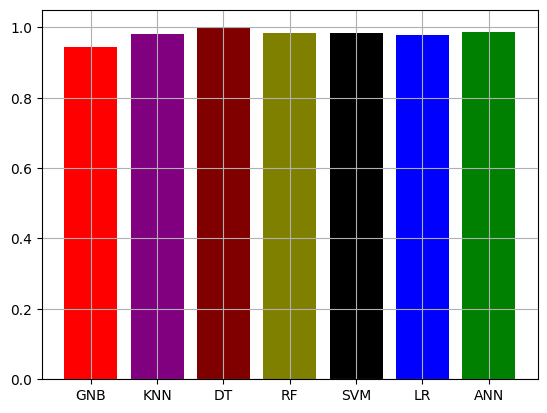

In [26]:
import matplotlib.pyplot as plt
acc_train=[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["red","purple","maroon","olive","black","blue","green"]
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

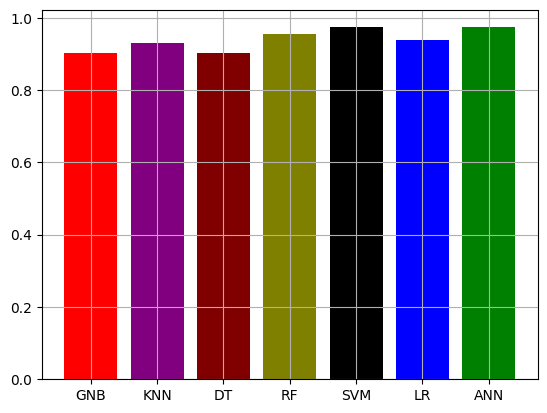

In [27]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["red","purple","maroon","olive","black","blue","green"]
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

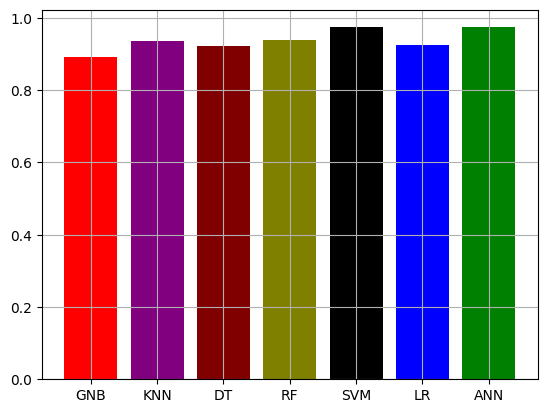

In [28]:
p=[p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["red","purple","maroon","olive","black","blue","green"]
plt.bar(title,p,color=colors)
plt.grid()
plt.show()

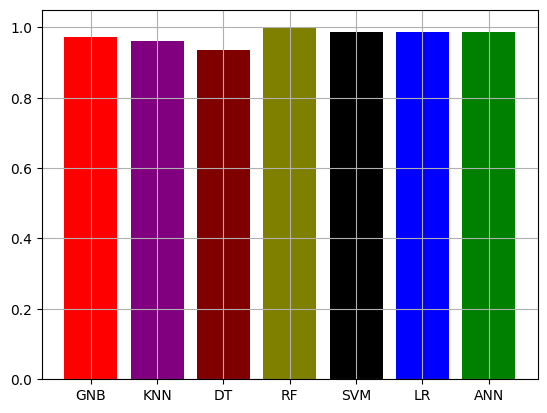

In [29]:
r=[r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]
title=["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors=["red","purple","maroon","olive","black","blue","green"]
plt.bar(title,r,color=colors)
plt.grid()
plt.show()